In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load survey data
df = pd.read_csv("../2_data_preparation/survey_data/clean_survey_responses.csv")
# Rename columns for easier access (optional)
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]


C:\Users\sahar\AppData\Local\Temp\ipykernel_31332\1140683287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="age", palette="Set2")


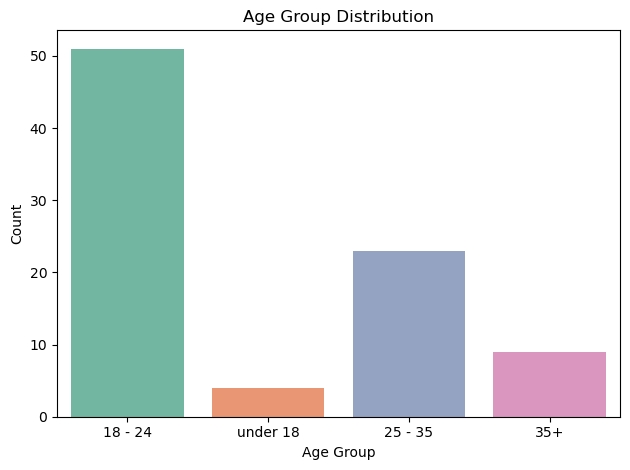

In [16]:
#What is the distribution of age groups in the dataset?
sns.countplot(data=df, x="age", palette="Set2")
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


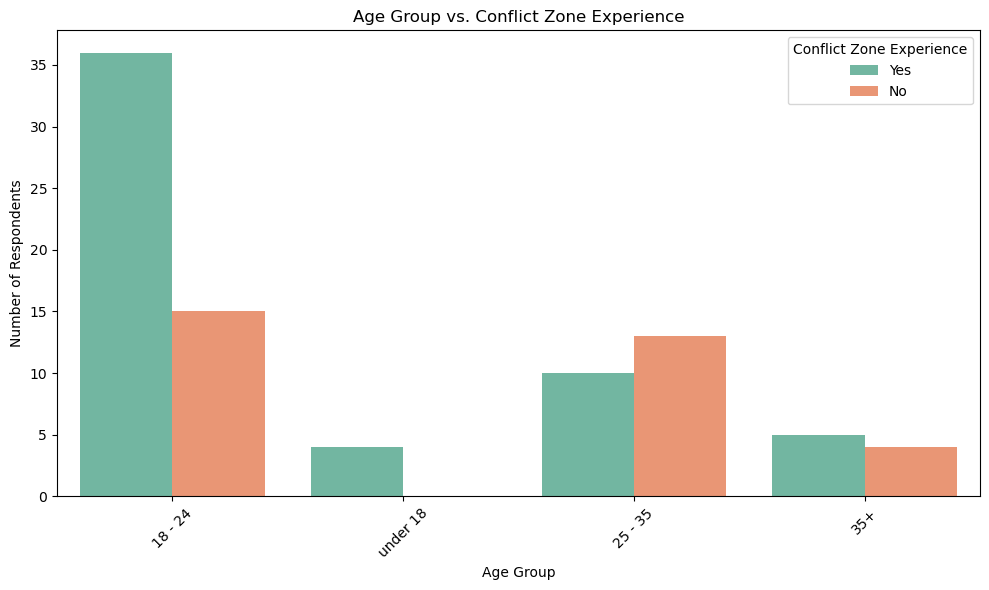

In [3]:
# Countplot of age group vs. conflict zone experience
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x="age",
    hue="have_you_ever_lived_in_or_near_a_conflict_zone?",
    palette="Set2",
)

plt.title("Age Group vs. Conflict Zone Experience")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.legend(title="Conflict Zone Experience")
plt.tight_layout()
plt.show()


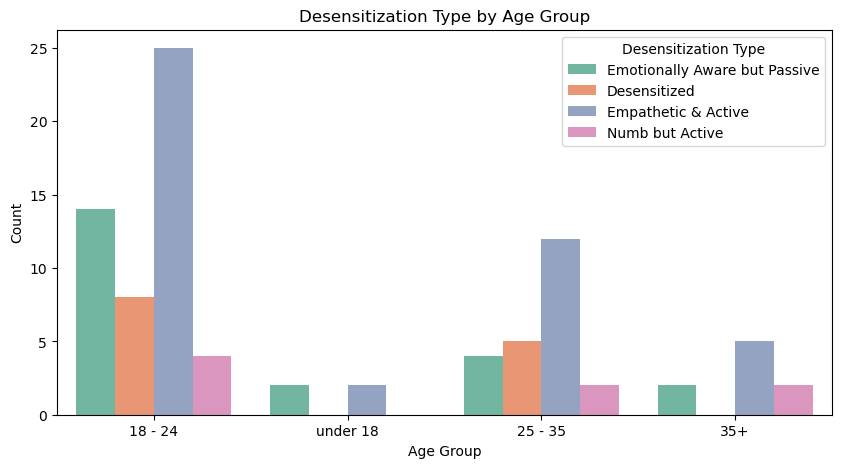

In [4]:
# . How does desensitization type vary by age group?
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="age", hue="desensitization_type", palette="Set2")
plt.title("Desensitization Type by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Desensitization Type")
plt.show()


C:\Users\sahar\AppData\Local\Temp\ipykernel_31332\2509880201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


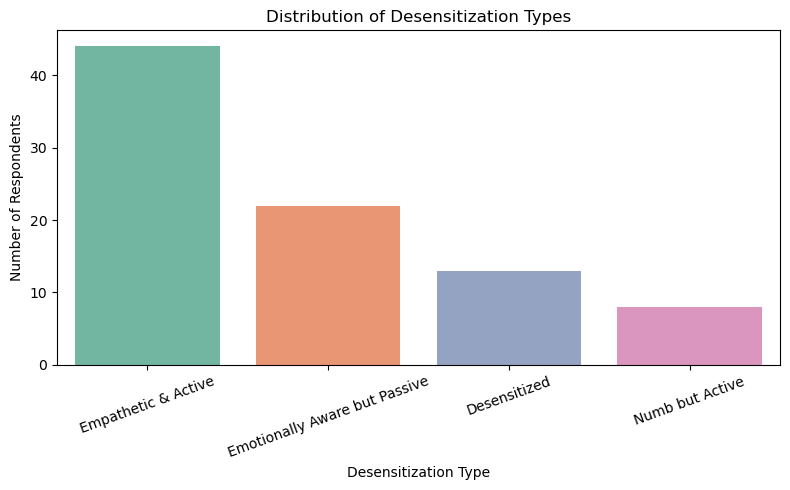

In [5]:


plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x="desensitization_type",
    order=df["desensitization_type"].value_counts().index,
    palette="Set2",
)
plt.title("Distribution of Desensitization Types")
plt.xticks(rotation=20)
plt.xlabel("Desensitization Type")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.show()


C:\Users\sahar\AppData\Local\Temp\ipykernel_31332\1998286615.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="which_platform_do_you_use_most_often?", palette="Set1")


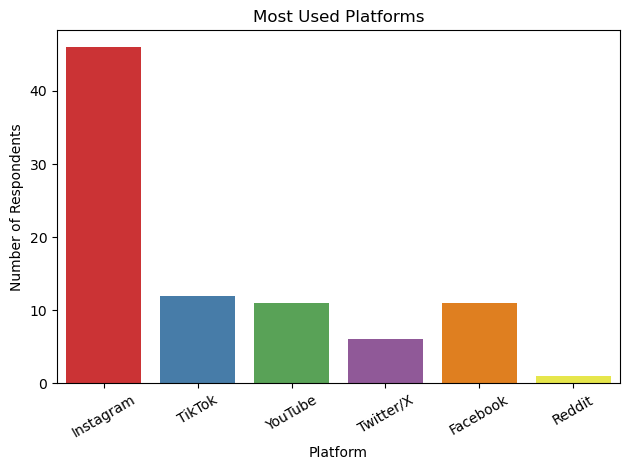

In [6]:
sns.countplot(data=df, x="which_platform_do_you_use_most_often?", palette="Set1")
plt.title("Most Used Platforms")
plt.xlabel("Platform")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


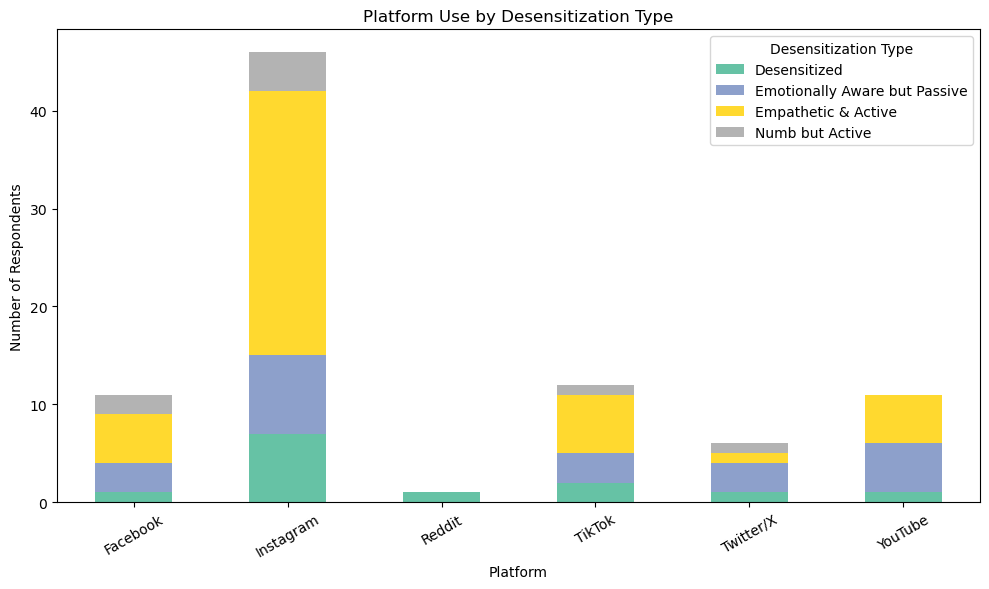

In [7]:
#Which desensitization type dominates each platform?
platform_cross = pd.crosstab(
    df["which_platform_do_you_use_most_often?"], df["desensitization_type"]
)
platform_cross.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Set2")
plt.title("Platform Use by Desensitization Type")
plt.xlabel("Platform")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=30)
plt.legend(title="Desensitization Type")
plt.tight_layout()
plt.show()


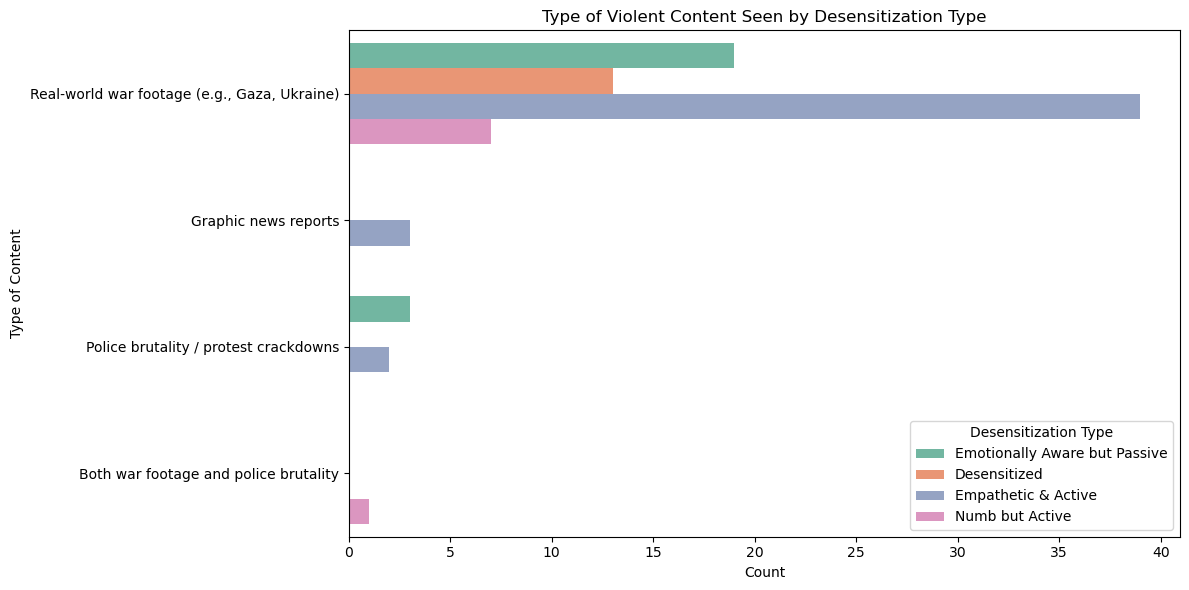

In [8]:
#What types of violent content are most frequently seen?
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    y="what_kind_of_violent_content_do_you_most_often_see?",
    hue="desensitization_type",
    palette="Set2",
)
plt.title("Type of Violent Content Seen by Desensitization Type")
plt.xlabel("Count")
plt.ylabel("Type of Content")
plt.legend(title="Desensitization Type")
plt.tight_layout()
plt.show()


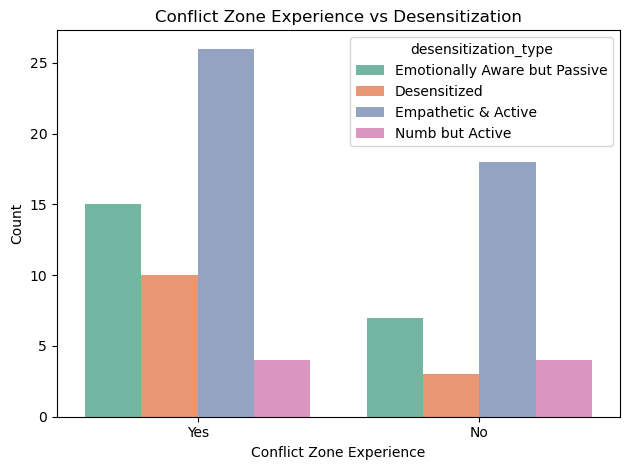

In [9]:
# Does living near conflict zones impact emotional response types?
sns.countplot(
    data=df,
    x="have_you_ever_lived_in_or_near_a_conflict_zone?",
    hue="desensitization_type",
    palette="Set2",
)
plt.title("Conflict Zone Experience vs Desensitization")
plt.xlabel("Conflict Zone Experience")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [10]:
# What is the average score distribution per desensitization type?
print(
    df.groupby("desensitization_type")[
        ["emotional_score", "cognitive_score", "behavioral_score"]
    ]
    .mean()
    .round(2)
)


                               emotional_score  cognitive_score  \
desensitization_type                                              
Desensitized                              4.46             2.92   
Emotionally Aware but Passive             1.59             2.82   
Empathetic & Active                       1.34             2.58   
Numb but Active                           4.25             1.75   

                               behavioral_score  
desensitization_type                             
Desensitized                               4.46  
Emotionally Aware but Passive              4.45  
Empathetic & Active                        1.68  
Numb but Active                            1.75  


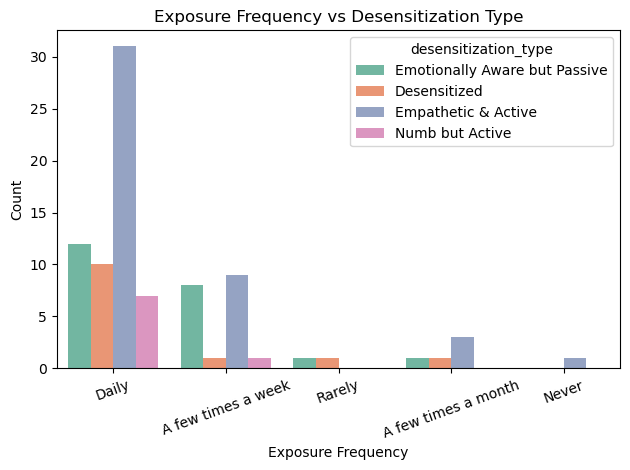

In [11]:
# How does exposure frequency correlate with desensitization?
sns.countplot(
    data=df,
    x="how_often_do_you_encounter_violent_or_graphic_content_online_(e.g.,_war_footage,_explosions,_shootings)?",
    hue="desensitization_type",
    palette="Set2",
)

plt.title("Exposure Frequency vs Desensitization Type")
plt.xlabel("Exposure Frequency")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


C:\Users\sahar\AppData\Local\Temp\ipykernel_31332\790752147.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="age", y="behavioral_score", palette="Set2")


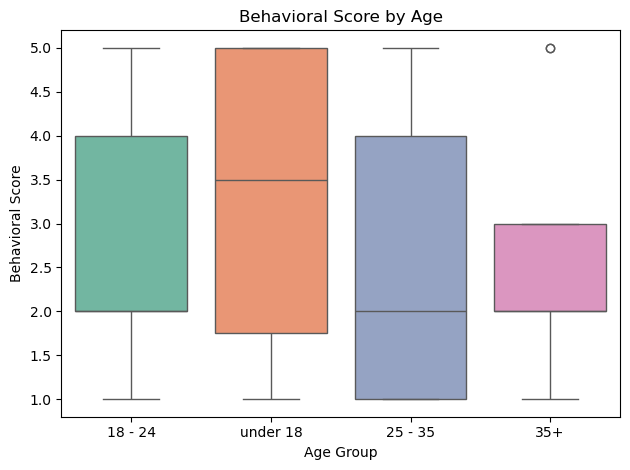

In [12]:
# How does behavioral score vary across age groups?
sns.boxplot(data=df, x="age", y="behavioral_score", palette="Set2")
plt.title("Behavioral Score by Age")
plt.xlabel("Age Group")
plt.ylabel("Behavioral Score")
plt.tight_layout()
plt.show()


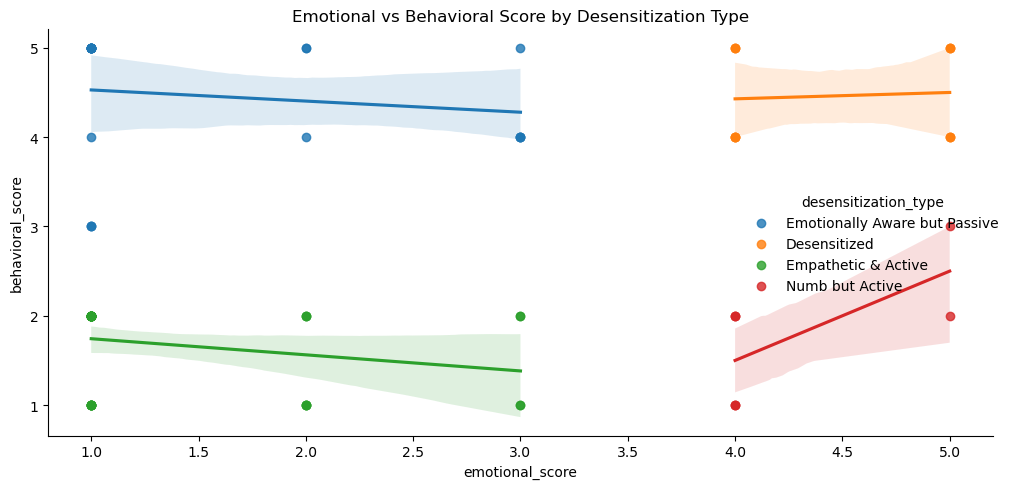

In [13]:
#What is the relationship between emotional and behavioral scores across desensitization types?
sns.lmplot(
    data=df,
    x="emotional_score",
    y="behavioral_score",
    hue="desensitization_type",
    aspect=1.5,
)

plt.title("Emotional vs Behavioral Score by Desensitization Type")
plt.tight_layout()
plt.show()